![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<a href="https://hub.callysto.ca/jupyter/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fcallysto%2Fcurriculum-notebooks&branch=master&subPath=Mathematics/DataAndSinusoidalFunctions/data-and-sinusoidal-functions.ipynb&depth=1" target="_parent"><img src="https://raw.githubusercontent.com/callysto/curriculum-notebooks/master/open-in-callysto-button.svg?sanitize=true" width="123" height="24" alt="Open in Callysto"/></a>

In [ ]:

import ipywidgets as w

import plotly.graph_objs as go

# Representing Data, Using Sinusoidal Function, to Solve Problems

![rolloercoaster gif](https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif)

<p>https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif</p>

## Overview

### Lesson outcomes
- Graph data and determine the sinusoidal functions that best approximate the data.
- Interpret the graph of a sinusoidal function that models a situation, and explain the reasoning.

## Introduction

In Mathematics, given a set of data points, it is possible to construct a curve, or mathematical function, that has the best fit to those points. This process is called curve fitting.

In the case that the data are somewhat cyclic, it is possible to sketch a curve of best fit that somehow resembles a sinusoidal function.  The fitting sinusoidal curve is found by determining the specific parameters which makes the curve match your data as closely as possible.

To better understand what we mean by cyclic data, have a look at a swinging pendulum:

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pendulum-no-text.gif?20201216081225" style="width: 400px;"/>

[Wikimedia - Pendulumn-no-text.gif](https://commons.wikimedia.org/wiki/File:Pendulum-no-text.gif)

Pendulum motion can be described with the formula:

$f(t) = \theta_0 \cos\left(\sqrt{\frac{g}{l}}t\right)$

#### Example

Suppose we collected data about the height of the pendulum at different times:

Time (s) | Height (m)
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 14.1
5 | 9.3
6 | 13.6
7 | 16.8
8 | 13.8
9 | 9.2
10 | 13.4

The following plot shows the collected data.

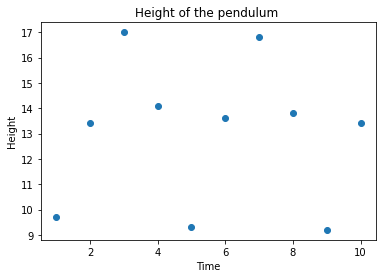

In [2]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(1,10,10)
height= np.array([9.7, 13.4, 17, 14.1, 9.3, 13.6, 16.8, 13.8, 9.2, 13.4])
plt.plot(time, height, 'o')
plt.title("Height of the pendulum ")
plt.xlabel("Time")
plt.ylabel("Height")
plt.show()

The graph below shows the sinusoidal function that best fits the data we have collected.

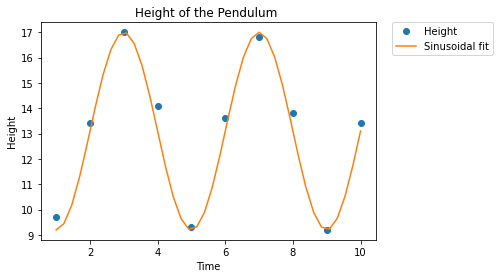

In [11]:
x = np.linspace(1,10,40)
y = 3.9*np.sin((2*np.pi)*(x+2)/4) + 13.1
plt.plot(time, height, 'o', label = 'Height')
plt.plot(x, y, label = 'Sinusoidal fit')
plt.title("Height of the Pendulum ")
plt.xlabel("Time")
plt.ylabel("Height")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

## The Sinusoidal Function

Sinusoidal functions can all be expressed as a sine function, in general form:

$y = a \sin (bx-c)+d$

- $a$ is the **amplitude**, the vertical footprint of a graph
    - $a = \frac{\text{maximum value} - \text{minimum value}}{2}$
    - $a$ is always positive
- $b$ is the **frequency**, the number of cycles that happen in $360^{\circ}$ or $2\pi$ radians
    - it can be used to find the **period**: $T= \frac{360^{\circ}}{b} \quad\text{  or  } \quad T= \frac{2\pi}{b}$
    - the larger the frequency, the more condensed the waves will be
- $c$ is the **phase shift**, the horizontal translation that has been applied to the graph of $y=\sin(x)$
    - if $c>0$ the graph is shifted to the right, otherwise it is shifted to the left
- $d$ is the **midline**, showing how much the function has been translated vertically
    - $d = \frac{\text{maximum value} + \text{minimum value}}{2}$
    - if $d>0$, the graph is shifted up, otherwise it is shifted down

<img src="./figures/sine_sinusoidal.jpg" style="width: 500px;"/>

## Matching the equation of a sinusoidal function to the corresponding graph

The simplest and most basic sinusoidal function we could come across  is $y=\sin(x)$ whose graph is

<img src="./figures/sine.jpg" style="width: 700px;"/>

We've already learned that the value of $a$ changes how tall or short the graph is. The figure below shows you different sinusoidal functions that have different amplitudes: <br>

<img src="./figures/amplitudes.jpg" style="width: 700px;"/>

By changing the value of $b$, we can see whether a graph is more 'stretched' or 'condensed'. The figure below shows you different functions with different periods: <br>

<img src="./figures/periods.jpg" style="width: 700px;"/>

The figure below describes how the value of $c$ translates the graph horizontally: <br>

<img src="./figures/c_values.jpg" style="width: 700px;"/>

Finally, the figure below shows how $d$ moves the graph of $\sin(x)$ vertically: <br>

<img src="./figures/d_value.jpg" style="width: 700px;"/>

Use the following widget to modify the parameters of the sine wave to experiment yourself.

In [ ]:
# Sliders to select values
slider_a = w.IntSlider(value=1, min=-10, max=10, description=r'$a$')
slider_b = w.IntSlider(value=1, min=-10, max=10, description=r'$b$')
slider_c = w.IntSlider(value=1, min=-100, max=100, step=10, description=r'$c$')
slider_d = w.IntSlider(value=1, min=-10, max=10, description=r'$d$')

# Plot
fig = go.FigureWidget()
scattf = fig.add_scatter(mode='lines', marker_size=5)

def response(change):
    x = []
    y = []
    with fig.batch_update():
        for i in range(1,501):
            x.append(i)
            y.append((slider_a.value*(np.sin(np.radians(slider_b.value*i-slider_c.value)))) + slider_d.value) # a*sin(bx-c)+d
        fig.data[0].x = x
        fig.data[0].y = y
        fig.update_layout(yaxis_range=[-20,20],
                          xaxis_range=[0,501],
                          title_text=(r'$ y = a \sin (bx-c)+d$')
                         )

slider_a.observe(response, names="value")
slider_b.observe(response, names="value")
slider_c.observe(response, names="value")
slider_d.observe(response, names="value")
response('')

w.VBox([fig, slider_a, slider_b, slider_c, slider_d])

### Example

Write the equation of the sinusoidal function corresponding to the following graph.

<img src="./figures/example_sin.jpg" style="width: 700px;"/>

We start by computing the amplitude: we know that its value is given by

$$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$ 

By looking at the graph we observe that the $\text{maximum value} = 1$ and $\text{minimum value} = -5$ so 

$$a = \frac{1 -(-5)}{2} = \frac{6}{2} = 3$$

Next we know that the value of $d$ is given by 

$$d = \frac{\text{maximum value} + \text{minimum value}}{2}.$$

So $$d = \frac{1 + (-5)}{2} = \frac{-4}{2} = -2.$$

Next we can compute the value of $b$. The period of the graph is 6, which can be measured from the peak at  $x = 1$  to the next peak at  $x = 7$, or from the distance between two troughs. We know that $T= \frac{2\pi}{b}$. By inverting the previous formula we get

$$ b = \frac{2\pi}{T}=\frac{2\pi}{6}=\frac{\pi}{3}$$

So far for our sinusoidal function equation, we have 

$$y = 3\sin\left(\frac{\pi}{3}x -c\right) -2$$

The simplest way to compute $c$ is by substituting the coordinates of a point on the curve into the function. For example, we can pick the point with coordinates $(1,1)$. Substituting these coordinates into our function we get

$$1 = 3\sin\left(\frac{\pi}{3} -c\right) -2$$

$$3 = 3\sin\left(\frac{\pi}{3} -c\right)$$

$$1 = \sin\left(\frac{\pi}{3} -c\right)$$
When does $\sin = 1$? Well, it does at many inputs, but the "first" one is $\sin(\frac{\pi}{2})$.

$$\sin\left(\frac{\pi}{2}\right)=1$$

$$\left(\frac{\pi}{3} -c\right)=\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c =- \frac{\pi}{2} +\frac{\pi}{3}= \frac{\pi}{6}$$


So our sinusoidal function has equation

$$y = 3\sin\left(\frac{\pi}{3}x + \frac{\pi}{6}\right) -2$$

### Exercise

Find the equation of the sinusoidal function for the graph below.

<img src="./figures/sin_exercise.jpg" style="width: 700px;"/>
## Determine the characteristics parameters of a sinusoidal function

In the next example, we will learn how to compute the characteristic parameters when we're given the equation of a sinusoidal function.

Determine the characteristic parameters from the following equation:
$$y = 5\sin(3x) +2$$

<ul>
    <li>$a$ = 5 so the amplitude is 5
     <li>$b$ = 3 so the period $T$ is $\frac{2\pi}{3}$
     <li>$c$  = 0 so there is no horizontal translation
     <li>$d$ = 2 so the equation of the midline is at $y = 2$
<ul>


### Exercise: Finding the characteristic parameters of a sinusoidal function

Determine the characteristic parameters from the following equation:

$$y = 14.1\sin(4.2x+3.4)+2$$


### Example: Finding a Sinusoidal Functions from Temperature Data

Let's assume that we have some data representing the average temperate for each month:

Month | Average Temperature
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 22.2
5 | 27.2
6 | 32.9
7 | 36.5
8 | 38.4
9 | 32.9
10 | 24.4
11 | 19
12 | 11

The data is presented in the graph below.

In [ ]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
plt.plot(month, temperature, 'o')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

We want to fit this data to a sinusoidal function $ y = a \sin (bx-c)+d$.

First of all, we need to determine the *amplitude* $a$:

$$a = \frac{\text{maximum value} - \text{minimum value}}{2} = \frac{38.4-9.7}{2} =14.35$$

Next, we determine the value of the midline $d$:

$$d = \frac{\text{maximum value} + \text{minimum value}}{2} = \frac{38.4+9.7}{2} =24.05$$

For this exercise, the frequency $b$ be computed in the following way. The  average temperature cycle will  repeat itself every year, so the period $T = 12$ months. Therefore $b$ can be computed by inverting the formula for the period $T$:

$$b = \frac{2\pi}{T} = \frac{2\pi}{12} =0.52$$

Using $a=14.35$, $b = 0.52$, and $d = 24.05$, determine horizontal shift by choosing an arbitrary data point $(x,y)$ from the given table and solving the equation 

$$y = 14.35 \sin (0.52x-c)+24.05$$
for $c$.

Let’s choose the first data point, $x = 1$ (January), $y = 9.7$

$$9.7 = 14.35 \sin (0.52(1)-c)+24.05$$

$$-14.35.7 = 14.35 \sin (0.52-c)$$

$$-1 =  \sin (0.52-c)$$


When does $\sin = -1$? Again, it does at many places, but the main one is at $- \frac{\pi}{2}$.

$$\sin\left(-\frac{\pi}{2}\right)=-1$$

So we have

$${0.52 -c}=-\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c = \frac{\pi}{2} + 0.52 = 2.09$$

So the sinusoidal function that fits the data is

$$y = 14.35 \sin (0.52x-2.09)+24.05$$

and its graph is shown below.

In [ ]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
x = np.linspace(1,12, 24)
y = 14.35*np.sin(0.52*x -2.09) + 24.05
plt.plot(month, temperature, 'o', label = 'Average temperature')
plt.plot(x, y, label = 'Sinusoidal fit')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Exercise

Tom boards the Ferris wheel at the Pacific Exhibition. When the ride begins, his height above the ground can be 
modelled by

$$x = 43\sin(3.5t-0.9)+47$$

How long does it take to the Ferris wheel to complete one revolution (period)?

What is the amplitude of the given function?

What is Tom's height above the ground when $t=10$?

What is the maximum height of Tom during the ride?

### Conclusions

<ul>
    <li> Cyclic data can be fit by a sinusoidal curve
     <li> A sinusoidal curve is uniquely defined by characteristic parameters
     <li> The parameters are the amplitude, the frequency and  the horizontal and vertical translations 

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)